In [1]:
import pandas as pd

# **A- Customers data**

# 1-customers_dataset

In [2]:
df_customers = pd.read_csv('archive (4)\olist_customers_dataset.csv', encoding='latin-1')
df_customers.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Amr Saber\AppData\Local\Temp\ipykernel_28988\2356573097.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_customers = pd.read_csv('archive (4)\olist_customers_dataset.csv', encoding='latin-1')


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [5]:
df_customers.duplicated().sum()

0

# 2-geolocation_dataset

In [6]:
df_gelocation = pd.read_csv('archive (4)\olist_geolocation_dataset.csv', encoding='latin-1')
df_gelocation.head() # Use the correct variable name 'df_gelocatioon'

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Amr Saber\AppData\Local\Temp\ipykernel_28988\2531606343.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_gelocation = pd.read_csv('archive (4)\olist_geolocation_dataset.csv', encoding='latin-1')


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
df_gelocation.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1000158    False
1000159     True
1000160     True
1000161    False
1000162     True
Length: 1000163, dtype: bool

In [8]:
df_gelocation.drop_duplicates(inplace=True)

In [9]:
df_gelocation.duplicated().sum()

0

In [10]:
df_gelocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [11]:
df_gelocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


# 3- merge geolocation_ customers dataset

# rename column ['geolocation_zip_code_prefix']to ['customer_zip_code_prefix]

In [12]:
df_gelocation.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'},inplace=True)

# merage between customers_dataset and geolocation_dataset

In [13]:
df_merge1 = pd.merge(df_customers, df_gelocation, on='customer_zip_code_prefix', how='left') # Fix typo in df_geolocation
df_merge1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP


drop columns geolocation_city	geolocation_state

In [14]:
df_merge1.drop(columns=['geolocation_city','geolocation_state'],inplace=True) # Correct typo: 'colums' to 'columns'

In [15]:
df_merge1.rename(columns={'geolocation_lat':'customer_geolocation_lat'},inplace=True)
df_merge1.rename(columns={'geolocation_lng':'customer_geolocation_lng'},inplace=True)

In [16]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10328006 entries, 0 to 10328005
Data columns (total 7 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   customer_id               object 
 1   customer_unique_id        object 
 2   customer_zip_code_prefix  int64  
 3   customer_city             object 
 4   customer_state            object 
 5   customer_geolocation_lat  float64
 6   customer_geolocation_lng  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 551.6+ MB


In [17]:
#df_merge1.to_csv('customer data.csv', index=False)

# B-Orders data

# 1- order_payments_dataset

In [18]:
df_order_payments = pd.read_csv('archive (4)\olist_order_payments_dataset.csv')
df_order_payments.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Amr Saber\AppData\Local\Temp\ipykernel_28988\3439821068.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_order_payments = pd.read_csv('archive (4)\olist_order_payments_dataset.csv')


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [19]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB



# 2- order_reviews_dataset



In [20]:
df_order_reviews = pd.read_csv('archive (4)\olist_order_reviews_dataset.csv', encoding='latin-1')
df_order_reviews.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Amr Saber\AppData\Local\Temp\ipykernel_28988\2196520384.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_order_reviews = pd.read_csv('archive (4)\olist_order_reviews_dataset.csv', encoding='latin-1')


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,ParabÃ©ns lojas lannister adorei comprar pela ...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [21]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


# 3-ordars dataset

In [22]:
df_orders = pd.read_csv('archive (4)\olist_orders_dataset.csv', encoding='latin-1')
df_orders.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Amr Saber\AppData\Local\Temp\ipykernel_28988\1682670088.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_orders = pd.read_csv('archive (4)\olist_orders_dataset.csv', encoding='latin-1')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [23]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


# 4-merge between payments_dataset , reviews_dataset

In [24]:
df_merge2= pd.merge(df_order_payments, df_order_reviews, on='order_id', how='left')
df_merge2.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,NÃ£o recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39


In [25]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104477 entries, 0 to 104476
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 104477 non-null  object 
 1   payment_sequential       104477 non-null  int64  
 2   payment_type             104477 non-null  object 
 3   payment_installments     104477 non-null  int64  
 4   payment_value            104477 non-null  float64
 5   review_id                103677 non-null  object 
 6   review_score             103677 non-null  float64
 7   review_comment_title     11996 non-null   object 
 8   review_comment_message   42815 non-null   object 
 9   review_creation_date     103677 non-null  object 
 10  review_answer_timestamp  103677 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.8+ MB


# 5- merge between merge2 and orders_dataset

In [26]:
df_merge3= pd.merge(df_merge2, df_orders, on='order_id', how='left')
df_merge3.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,NÃ£o recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00


In [27]:
df_merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104477 entries, 0 to 104476
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104477 non-null  object 
 1   payment_sequential             104477 non-null  int64  
 2   payment_type                   104477 non-null  object 
 3   payment_installments           104477 non-null  int64  
 4   payment_value                  104477 non-null  float64
 5   review_id                      103677 non-null  object 
 6   review_score                   103677 non-null  float64
 7   review_comment_title           11996 non-null   object 
 8   review_comment_message         42815 non-null   object 
 9   review_creation_date           103677 non-null  object 
 10  review_answer_timestamp        103677 non-null  object 
 11  customer_id                    104477 non-null  object 
 12  order_status                  

# C- sellers data

# 1-sellars dataset and merges

In [28]:
df_sellers = pd.read_csv('archive (4)\olist_sellers_dataset.csv', encoding='latin-1')
df_sellers.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Amr Saber\AppData\Local\Temp\ipykernel_28988\3386080552.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_sellers = pd.read_csv('archive (4)\olist_sellers_dataset.csv', encoding='latin-1')


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [29]:
print("Columns in df_gelocation:", df_gelocation.columns)

Columns in df_gelocation: Index(['customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


In [30]:
# Make sure to execute this code in the same cell or before the merge operation
df_gelocation.rename(columns={'customer_zip_code_prefix':'seller_zip_code_prefix'},inplace=True)

# Now perform the merge
df_merge5 = pd.merge(df_sellers, df_gelocation, on='seller_zip_code_prefix', how='left')
df_merge5.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431,campinas,SP


In [31]:
df_merge5.rename(columns={'geolocation_lat':'seller_geolocation_lat'},inplace=True)
df_merge5.rename(columns={'geolocation_lng':'seller_geolocation_lng'},inplace=True)

In [32]:
df_merge5.drop(columns=['geolocation_city','geolocation_state'],inplace=True) # Correct typo: 'colums' to 'columns'

In [33]:
df_merge5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311796 entries, 0 to 311795
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seller_id               311796 non-null  object 
 1   seller_zip_code_prefix  311796 non-null  int64  
 2   seller_city             311796 non-null  object 
 3   seller_state            311796 non-null  object 
 4   seller_geolocation_lat  311789 non-null  float64
 5   seller_geolocation_lng  311789 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.3+ MB


In [34]:
#df_merge5.to_csv('sellers data.csv', index=False)

# d- Product data

# 1-products_dataset

In [35]:
df_products = pd.read_csv('archive (4)\olist_products_dataset.csv', encoding='latin-1')
df_products.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Amr Saber\AppData\Local\Temp\ipykernel_28988\3973013195.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_products = pd.read_csv('archive (4)\olist_products_dataset.csv', encoding='latin-1')


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [36]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


# 2-product category

In [37]:
df_product_category = pd.read_csv('archive (4)\product_category_name_translation.csv', encoding='latin-1')
df_product_category.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Amr Saber\AppData\Local\Temp\ipykernel_28988\2598564833.py:1: SyntaxWarning: invalid escape sequence '\p'
  df_product_category = pd.read_csv('archive (4)\product_category_name_translation.csv', encoding='latin-1')


,ï»¿product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [38]:
df_product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ï»¿product_category_name       71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


# 3- merge between product category and products_dataset

In [39]:
print("Columns in df_products:", df_products.columns)
print("Columns in df_product_category:", df_product_category.columns)


Columns in df_products: Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Columns in df_product_category: Index(['ï»¿product_category_name', 'product_category_name_english'], dtype='object')


merge between df_product_category and df_products

In [40]:
df_product_category.rename(columns={'ï»¿product_category_name':'product_category_name'},inplace=True)

In [41]:
df_merge6= pd.merge(df_products, df_product_category, on='product_category_name', how='left')
df_merge6.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [42]:
df_merge6.rename(columns={'product_category_name_english':'product_main_category'},inplace=True)

In [43]:
df_merge6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   product_main_category       32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [44]:
#df_merge6.to_csv('product data.csv', index=False)

# - order_items_dataset

In [45]:
df_order_items = pd.read_csv('archive (4)\olist_order_items_dataset.csv', encoding='latin-1')
df_order_items.head()

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Amr Saber\AppData\Local\Temp\ipykernel_28988\1941401555.py:1: SyntaxWarning: invalid escape sequence '\o'
  df_order_items = pd.read_csv('archive (4)\olist_order_items_dataset.csv', encoding='latin-1')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [46]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [47]:
df_order_items.duplicated().sum()

0

merge between df_merge7 and df_merge4 (Ordars)

In [48]:

df_merge7= pd.merge(df_merge3, df_order_items, on='order_id', how='left')
df_merge7.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,NÃ£o recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,...,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30 00:00:00,...,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19 00:00:00,...,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21 00:00:00,...,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21 00:00:00,...,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88


In [49]:
df_merge7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119140 entries, 0 to 119139
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119140 non-null  object 
 1   payment_sequential             119140 non-null  int64  
 2   payment_type                   119140 non-null  object 
 3   payment_installments           119140 non-null  int64  
 4   payment_value                  119140 non-null  float64
 5   review_id                      118143 non-null  object 
 6   review_score                   118143 non-null  float64
 7   review_comment_title           13989 non-null   object 
 8   review_comment_message         50242 non-null   object 
 9   review_creation_date           118143 non-null  object 
 10  review_answer_timestamp        118143 non-null  object 
 11  customer_id                    119140 non-null  object 
 12  order_status                  

In [67]:
#df_merge7.to_csv('orders data.csv', index=False)

In [51]:
df_merge7.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [52]:
df_merge1.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'customer_geolocation_lat',
       'customer_geolocation_lng'],
      dtype='object')

In [53]:
df_merge6.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_main_category'],
      dtype='object')

In [54]:
df_merge5.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_geolocation_lat', 'seller_geolocation_lng'],
      dtype='object')

Customers Clustering 

In [55]:

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df_merge7['Total_Purchase_Value'] = df_merge7['payment_value'] + df_merge7['freight_value']
customer_agg = df_merge7.groupby('customer_id').agg({
    'Total_Purchase_Value': 'sum',
    'order_id': 'count',
    'product_id': 'count'
}).reset_index()
customer_agg.columns = ['customer_id', 'Total_Purchase_Value', 'Number_of_Orders', 'Number_of_Products']
Customer_clustering = pd.merge(df_merge1, customer_agg, on='customer_id')
Customer_clustering.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,Total_Purchase_Value,Number_of_Orders,Number_of_Products
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,168.75,1,1
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,168.75,1,1
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,168.75,1,1
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,168.75,1,1
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,168.75,1,1


In [57]:
features_to_scale = ['Total_Purchase_Value', 'Number_of_Orders', 'Number_of_Products']
scaler = StandardScaler()
Customer_clustering[features_to_scale] = scaler.fit_transform(Customer_clustering[features_to_scale])
Customer_clustering[features_to_scale].head()

,Total_Purchase_Value,Number_of_Orders,Number_of_Products
0,-0.106717,-0.269313,-0.256388
1,-0.106717,-0.269313,-0.256388
2,-0.106717,-0.269313,-0.256388
3,-0.106717,-0.269313,-0.256388
4,-0.106717,-0.269313,-0.256388


In [58]:
sse = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Customer_clustering[features_to_scale])
    sse.append(kmeans.inertia_)

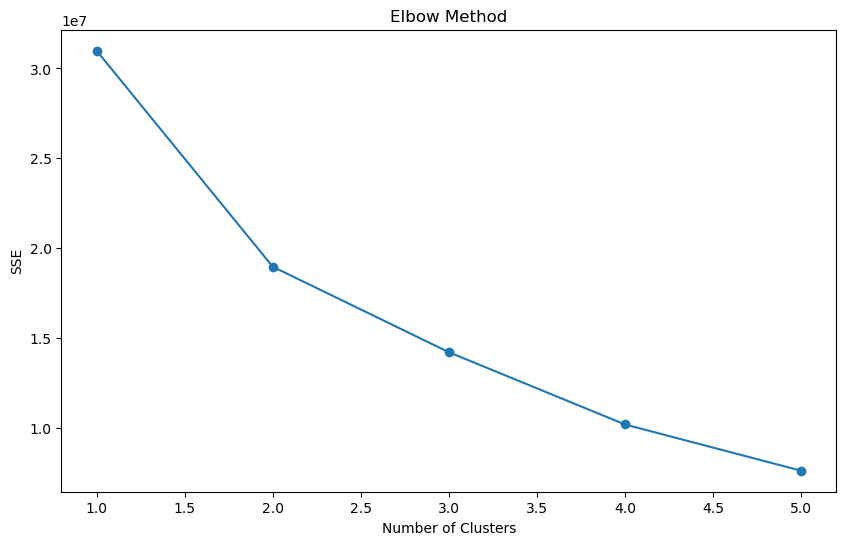

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [60]:
!pip install kneed

In [61]:
from kneed import KneeLocator

kneedle = KneeLocator(range(1, 6), sse, curve="convex", direction="decreasing")
optimal_clusters = kneedle.elbow
print(f"العدد الأمثل للمجموعات هو: {optimal_clusters}")

العدد الأمثل للمجموعات هو: 2


In [62]:
kmeans = KMeans(n_clusters=2, random_state=42)
Customer_clustering['Cluster'] = kmeans.fit_predict(Customer_clustering[features_to_scale])
print(Customer_clustering[['customer_unique_id', 'Cluster']].head())

                 customer_unique_id  Cluster
0  861eff4711a542e4b93843c6dd7febb0        1
1  861eff4711a542e4b93843c6dd7febb0        1
2  861eff4711a542e4b93843c6dd7febb0        1
3  861eff4711a542e4b93843c6dd7febb0        1
4  861eff4711a542e4b93843c6dd7febb0        1


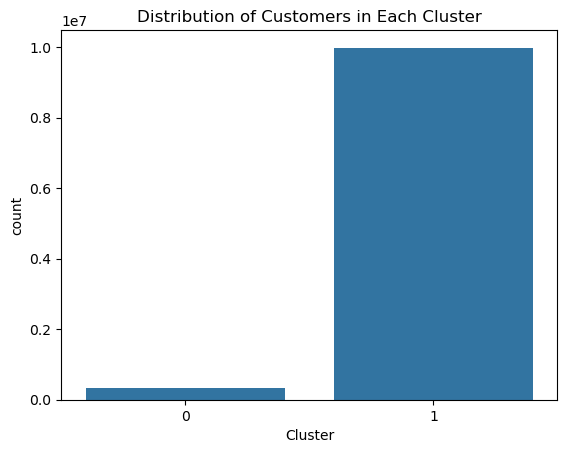

In [63]:
sns.countplot(x='Cluster', data=Customer_clustering)
plt.title('Distribution of Customers in Each Cluster')
plt.show()

In [66]:
#Customer_clustering.to_csv('Customer_clustering.csv', index=False)